In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'grid']) #dependency: SciencePlots
from fibonacci import generate_vertices
from linear_discetisation import Linear_disc_points
from commutators import test_angular_momentum_comutator, fourier_vector, calc_r, La_Lb_commutator
from lattice_actions import calc_mean_distance

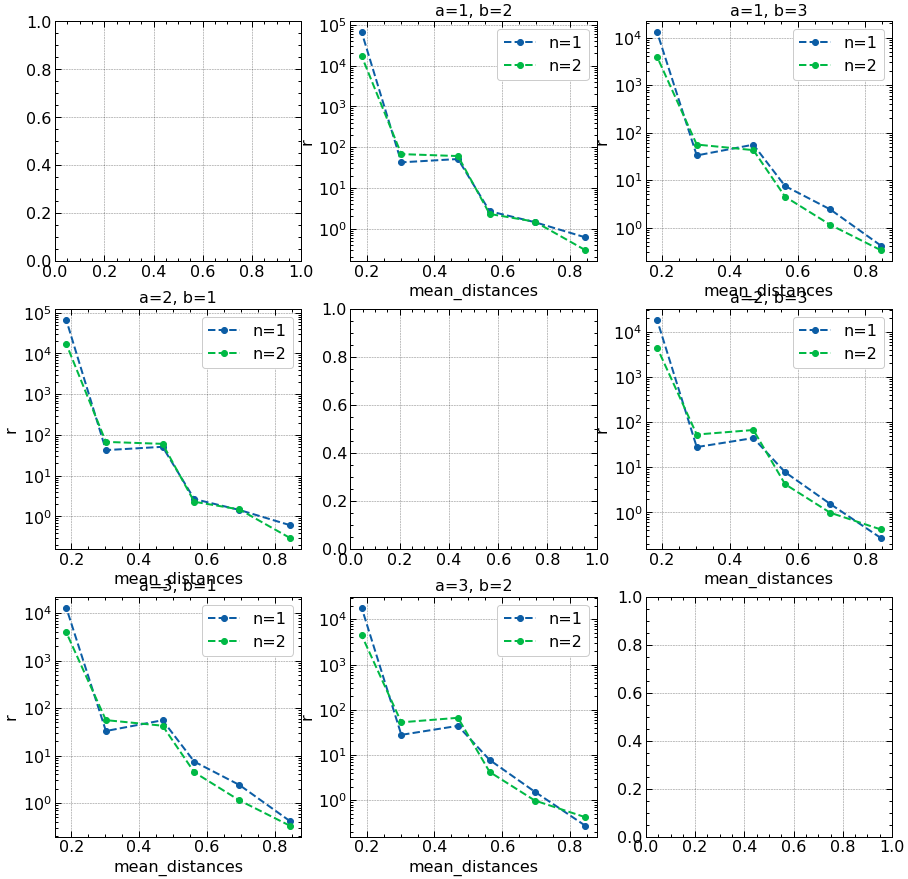

In [2]:
fig, axes = plt.subplots(3,3,figsize=(15,15))
N = np.array([2**i for i in range(4,10)])
Lattices = [generate_vertices(i) for i in N]
#Lattices = [Linear_disc_points(i) for i in range(4,10)]
mean_distances= []
rs = []
k = np.array([0.1,0,0])

for n in [1,2]:
    for a in [1,2,3]:
        for b in [1,2,3]:
            if a==b:
                continue
            for vertex in Lattices:
                comm = La_Lb_commutator(vertex, a, b, n=n)
                vec = fourier_vector(vertex, 1, k)
                rs.append(calc_r(comm, vec=vec))
                mean_distances.append(calc_mean_distance(vertex))
            #plot here
            ax = axes[a-1][b-1]
            ax.set_title(f"a={a}, b={b}")
            ax.plot(mean_distances, rs, "o--", label=f"n={n}")
            ax.set_ylabel("r")
            ax.set_xlabel("mean_distances")
            ax.legend(loc="best")
            ax.set_yscale("log")
            #end
            mean_distances = []
            rs = []

In [2]:
from derivative import angular_momentum, new_angular_momentum

In [3]:
lattice = np.loadtxt("F_16.csv")
La = angular_momentum(lattice, 1)
#np.savetxt("compPy.txt", La)

[[-0.67214619  0.14893332  0.83323843]
 [-0.07612639 -0.64905781  0.29318649]
 [ 0.11780624 -0.58011406  0.53030103]]
[-0.76133488  0.32754847  0.5274466 ] 

[[ 0.67214619 -0.12298303  0.0278943 ]
 [ 0.07612639 -0.74841948  1.04827481]
 [-0.11780624  0.54229181  0.30238335]]
[1.53581379 0.28311741 0.09060088] 

[[-0.14893332  0.88114207 -0.19004798]
 [ 0.64905781 -0.06590777 -0.98860276]
 [ 0.58011406 -0.14949044  0.03052421]]
[0.30614185 1.21255163 0.12015664] 

[[ 0.1818266  -0.83323843 -0.21401298]
 [ 0.13026628 -0.29318649 -0.89489089]
 [ 0.94391971 -0.53030103  0.78495759]]
[-1.14312918 -1.53610795  0.3368622 ] 

[[-0.86337429 -0.19678029 -0.0278943 ]
 [-0.13538419  0.87874141 -1.04827481]
 [-0.23111389  0.54626635 -0.30238335]]
[-0.99582354 -0.65323789 -0.41898213] 

[[ 0.12298303  0.43248099  0.06089891]
 [ 0.74841948  0.75667551 -1.22145254]
 [-0.54229181  0.66661394  0.1145942 ]]
[2.1680843  1.38760409 2.18805272] 

[[-0.88114207  0.89931966  0.51805603]
 [ 0.06590777  0.23753

In [4]:
unit_vec = np.array([1,0,0])
matrix = np.array([[0.67214619, 0.0278943,  0.5036643],
                    [0.07612639, 1.0482748, -0.1189268],
                    [-0.11780624, 0.3023833, -1.0437898]])
#matrix[:,::-1]
np.linalg.solve(matrix.T[:,::-1], unit_vec)

array([ 0.83684988, -0.2857494 ,  1.66680883])

In [5]:
np.dot(unit_vec, np.linalg.inv(matrix.T))

array([ 1.66680883, -0.147226  , -0.23077364])